In [3]:
!pip install natsort

In [29]:
# HTTP
from requests import get

# OS and IO
from io import BytesIO

# Unzipping
from zipfile import ZipFile

# Science and shi*
import scipy
import matplotlib.pyplot as plt
import numpy as np

# For sorting files
from natsort import natsorted

# Read files in order
request = get('http://www.cl.cam.ac.uk/Research/DTG/attarchive/pub/data/att_faces.zip')
zip_file = ZipFile(BytesIO(request.content))
files = zip_file.namelist()
files = natsorted(files)
zip_file.extractall()

# Images to training and test data matrices:
y = np.arange(1, 41, 1)
y = np.repeat(y, 10).reshape(400, 1)
ytest = y[1::2, ::]
ytraining = y[0::2, ::]

D = np.array(np.empty([0, 10304]))
for f in files:
    if f.endswith(".pgm"):
        arr = scipy.misc.imread(f)
        # The array is transposed because I checked its dimensions and they were 112X92
        arr = arr.T
        D = np.vstack((D, arr.flatten()))
Dtest = D[1::2, ::]
Dtraining = D[0::2, ::]


# 200 training examples with 10304 feature/pixel
assert Dtraining.shape == (200, 10304)

# 200 test examples with 10304 feature/pixel
assert Dtest.shape == (200, 10304)



[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]


**Sci-kit LDA learn on iris data**

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
Y = iris.target
clf = LDA()
clf.fit(X, Y)
# eigen vectors
clf.scalings_
#np.unique(iris.target)


array([[ 0.81926852,  0.03285975],
       [ 1.5478732 ,  2.15471106],
       [-2.18494056, -0.93024679],
       [-2.85385002,  2.8060046 ]])

**LDA from scratch on iris data**

In [6]:
Xtest = X[1::2, ::]
Xtraining = X[0::2, ::]
Ytest = Y[1::2]
Ytraining = Y[0::2]
iris_means = np.array(np.empty([0, 4]))
for i in range(0, 150, 50):
    user = X[i:i+50:, ::]
    iris_mean = np.mean(user, axis=0)
    iris_means = np.vstack((iris_means, iris_mean))
iris_mean_sample = np.mean(X, axis=0)

iris_n = iris_means.shape[0]
overall_mean = np.mean(X, axis=0)
iris_B = np.zeros((4,4))
for i in range(0, 3): 
    overall_mean = overall_mean.reshape(4,1) 
    mean_vec = iris_means[i].reshape(4,1)
    iris_B += 50 * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
    i += 1
iris_Z = np.array(np.empty([0, 4]))
j = 0
for i in range(0, 150, 50):
    user = X[i:i+50:, ::]
    iris_Z = np.vstack((iris_Z, user-iris_means[j].T))
    j += 1
    
iris_S = iris_Z.T.dot(iris_Z)
iris_S_inverse = np.linalg.inv(iris_S)
iris_S_inverse_B = iris_S_inverse.dot(iris_B)
eigen_values, eigen_vectors = np.linalg.eig(iris_S_inverse_B)
print(eigen_vectors)


[[ 0.20490976 -0.00898234  0.68226001 -0.142006  ]
 [ 0.38714331 -0.58899857 -0.44093159  0.38002784]
 [-0.54648218  0.25428655 -0.46521433  0.44439255]
 [-0.71378517 -0.76703217  0.35167633 -0.7987042 ]]


**LDA**

In [7]:
means = np.array(np.empty([0, 10304]))
for i in range(0, 200, 5):
    user = Dtraining[i:i+5:, ::]
    mean = np.mean(user, axis=0)
    means = np.vstack((means, mean))
    
print(means.shape)
n = means.shape[0]
#Because python returns mean vector as row not column vector, therefore we reversed the equation
overall_mean = np.mean(Dtraining, axis=0)
B = np.zeros((10304, 10304))
for i in range(0, n): 
    overall_mean = overall_mean.reshape(10304,1) 
    mean_vec = means[i].reshape(10304,1)
    B += 5 * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
    i += 1
Z = np.array(np.empty([0, 10304]))
j = 0
for i in range(0, 200, 5):
    user = Dtraining[i:i+5:, ::]
    Z = np.vstack((Z, user-means[j].T))
    j += 1

#This is S, we don't have to sum all Ss from 1 to 40, I tested that with an example here https://pastebin.com/TABBdB5C    
S = Z.T.dot(Z)
S_inverse = np.linalg.inv(S)
S_inverse_B = S_inverse.dot(B)
eigen_values, eigen_vectors = np.linalg.eig(S_inverse_B)


(40, 10304)


In [0]:
U = eigen_vectors[:,range(0,39)]
assert U.shape == (10304, 39)
project_trainning = Dtraining.dot(U)
project_test = Dtest.dot(U)

**Sci-kit learn KNN on iris data**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 657, in launch_instance
    app.initialize(argv)
  File "<decorator-gen-121>", line 2, in initialize
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 87, in catch_config_error
   

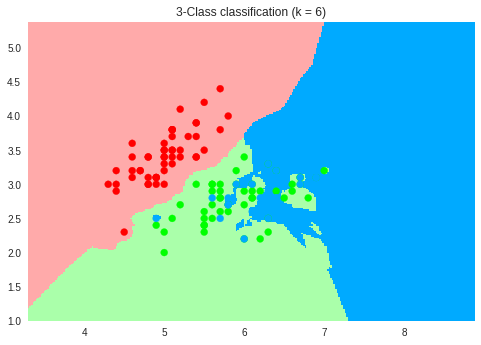

In [18]:
import matplotlib
matplotlib.use('GTKAgg')
 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
 
n_neighbors = 6
 
# import some data to play with
iris = datasets.load_iris()
 
# prepare data
X = iris.data[:, :2]  
y = iris.target
h = .02 
 
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])
 
# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)
 
# calculate min, max and limits
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
 
# predict class using data and kNN classifier
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (n_neighbors))
plt.show()